# FUNDAMENTAL AND GEOMETRIC TRANSFORMATION

In [ ]:
# Install Libraries

! pip install opencv-contrib-python

In [5]:
# Loading Libraries

import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# Check Libaries Version

import sys

print(f"python ver:{sys.version}")
print(f"opencv ver: {cv2.__version__}")

python ver:3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
opencv ver: 4.10.0


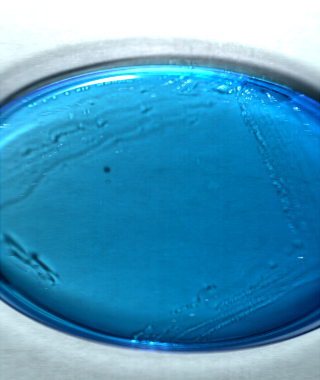

In [2]:
# Loading Image

img_path = 'image.png'
img = cv2.imread(img_path)

cv2_imshow(img)

#Grayscaling

converting an image from other color spaces e.g. RGB, CMYK, HSV, etc. to shades of gray. Dimension reduction, reduces model complexity, for other algorithms to work

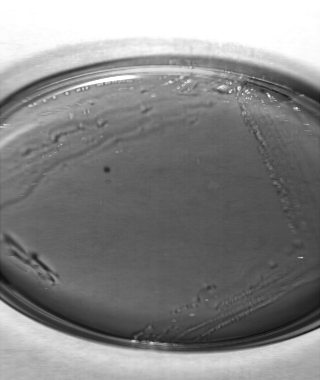

In [3]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2_imshow(gray_img)

## Resizing / Scaling / Resampling



*   Change img dim by changing no. of pixel im img.
*   Affects both visual size and amount of data needed to represent it.
*   Uses interpolation techniques to approximate the color and intensity values of pixels.

### Upscaling / Upsampling / Image Enlargement



*   can make images appear sharper and more detailed.
*   When adding pixels, interpolation is used to estimate the color and intensity values of the new pixels based on the existing pixels.
*   Problem of loss of sharpness, introduction of visual artifacts such as blurring or noise.


### Downscaling / Downsampling / Image Reduction


*   When removing pixels, interpolation is used to estimate the color and intensity values of the remaining pixels based on the surrounding pixels.
*   Problem of loss of detail, sharpness, and overall image quality

# Resize by Specifying Dimensions - Non-Aspect Ratio Preserving Resize (Stretch to)

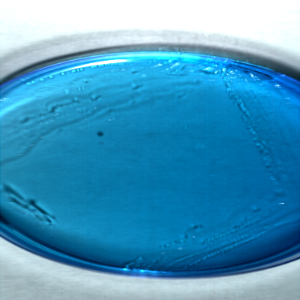

In [ ]:
dim = (300, 300)
itp = cv2.INTER_LINEAR
# None is for dst

resize_img = cv2.resize(img, dim, interpolation=itp)

cv2_imshow(resize_img)

# Resize using scaling factor

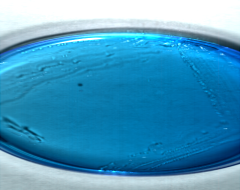

In [ ]:
fx, fy = 0.75, 0.5
itp = cv2.INTER_LINEAR
# dst

resize_img = cv2.resize(img, None, fx=fx, fy=fy, interpolation=itp)

cv2_imshow(resize_img)

# Cropping

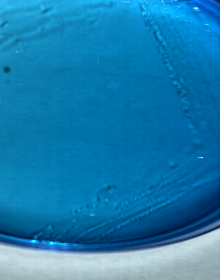

In [ ]:
x1, y1 = 100, 100   #Top left
x2, y2 = 1000, 700  #Bottom Right

crop_img = img[y1:y2, x1:x2]

cv2_imshow(crop_img)

# Rotation

## Rotation with cut-off

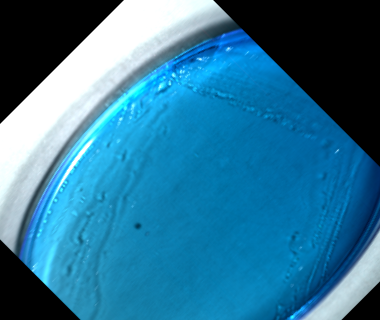

In [ ]:
(y, x, _) = img.shape
center = (y//2, x//2)
angle = 45
scale = 1.0

rot_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotate_img = cv2.warpAffine(img, rot_matrix, (y, x))

cv2_imshow(rotate_img)

# Flipping

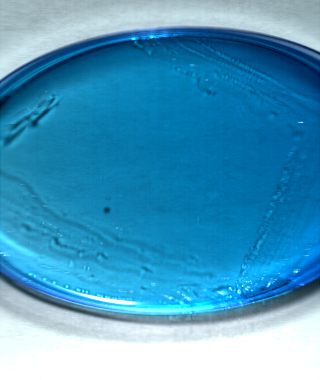

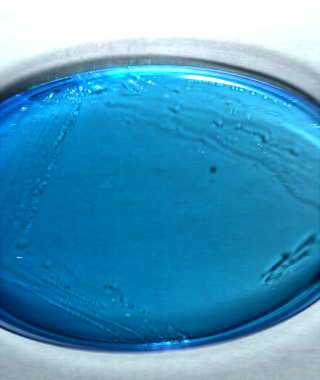

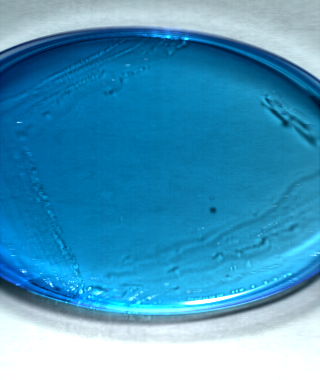

In [ ]:
flipped_y = cv2.flip(img, 0) #vertical
flipped_x = cv2.flip(img, 1) #horizontal
flipped_xy = cv2.flip(img, -1) #both direction

cv2_imshow(flipped_y)
cv2_imshow(flipped_x)
cv2_imshow(flipped_xy)

## Translation

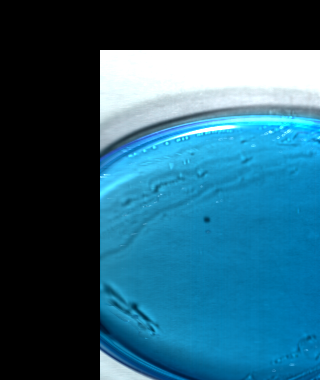

In [6]:
tx, ty = 100, 50
(height, width) = img.shape[:2]
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

translated_img = cv2.warpAffine(img, translation_matrix, (width, height))

cv2_imshow(translated_img)

### Filling empty space with custom color

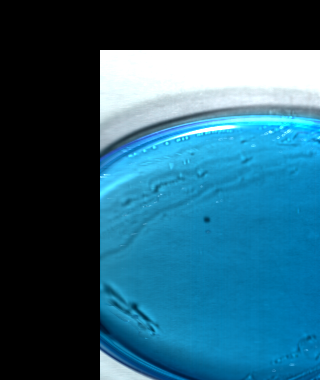

In [7]:
translated_image = cv2.warpAffine(img, translation_matrix, (width, height), borderMode=cv2.BORDER_CONSTANT, borderValue=(500, 500, 500))

cv2_imshow(translated_img)

### Circular Translation: Wrapping the Image

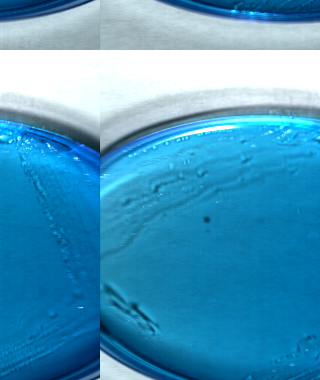

In [8]:
translated_image = cv2.warpAffine(img, translation_matrix, (width, height), borderMode=cv2.BORDER_WRAP)

cv2_imshow(translated_image)

## Affine Transformation

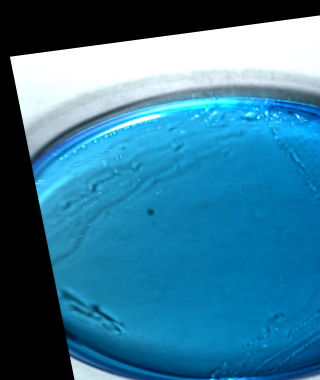

In [9]:
### Shear and Rotation

(rows, cols, channels) = img.shape

#### Define 3 points in the original img

pts1 = np.float32([[50, 50], [200, 50], [50, 200]])

#### Define 3 points in the output img

pts2 = np.float32([[70, 100], [220, 80], [100, 250]])

#### Compute the affine transformation matrix

matrix =cv2.getAffineTransform(pts1, pts2)

out_img = cv2.warpAffine(img, matrix,(cols, rows))

cv2_imshow(out_img)

## Perspective Transformation

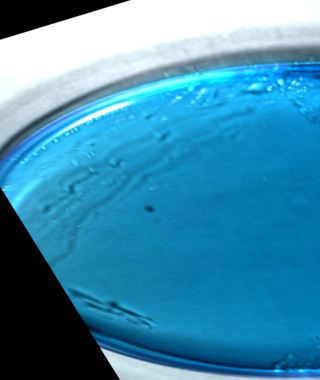

In [10]:
pts1 = np.float32([[50, 50], [200, 50], [50, 200], [200, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250], [290, 220]])

matrix = cv2.getPerspectiveTransform(pts1, pts2)

out_img = cv2.warpPerspective(img, matrix, (cols, rows))

cv2_imshow(out_img)